# Singular Value Decomposition

## Introduction

In the following, we are going to decompose a matrix using SVD.

Assuming a matrix $\textbf{M}$ of dimensions $I \times J$ and rank $R$, the SVD of $\textbf{M}$ can be written as:

$$\textbf{M} = \textbf{U} \Sigma \textbf{V}^\top$$

Where:
+ $\textbf{U} \in \mathbb{R}^{I\times R}$ is the orthogonal left singular matrix whose columns are the left singular vectors.
+ $\Sigma \in \mathbb{R}^{R\times R}$ is a diagonal matrix whose diagonal consists of the singular values in decreasing order.
+ $\textbf{V} \in \mathbb{R}^{J\times R}$ is the orthogonal right singular matrix whose columns are the right singular vectors.

Ideally, SVD reveals the rank of a matrix by looking at the number of singular values. In the presence of noise, the number of the most significant singular values can give an estimate of the intrinsic rank.

---

### The Case of Any Matrix

First, we build a matrix $\textbf{M}$ of dimensions $6\times 4$ such that all the columns are linearly independent.

$\textbf{M}$ is expected to be full, so the rank is $4$, which will appear in $\Sigma$.

In [3]:
# importing the required module 
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

M = np.random.randn(6,4)

print("M =\n", M)

M =
 [[0.802 0.639 -1.637 -0.003]
 [-0.012 -1.725 0.484 0.972]
 [-0.670 -0.530 0.860 0.200]
 [0.078 -0.362 1.254 -0.374]
 [0.685 -0.500 1.379 -0.370]
 [-0.915 0.739 -1.105 0.682]]


Now we compute the SVD:

In [4]:
U, S, V = np.linalg.svd(M, full_matrices=False)
V = np.transpose(V)

First, let's look at the factor matrices:

In [5]:
# left singular matrix
print("\nMatrix U =\n", U)

# diagonal matrix with the singular values
print("\nMatrix S =\n", np.diag(S))

# right singular matrix
print("\nMatrix V =\n", np.transpose(V))


Matrix U =
 [[0.507 -0.186 -0.576 -0.075]
 [-0.387 0.687 -0.591 -0.067]
 [-0.293 0.285 0.339 0.177]
 [-0.379 -0.221 0.174 -0.032]
 [-0.438 -0.380 -0.156 -0.732]
 [0.414 0.468 0.387 -0.649]]

Matrix S =
 [[3.344 0.000 0.000 0.000]
 [0.000 1.901 0.000 0.000]
 [0.000 0.000 1.486 0.000]
 [0.000 0.000 0.000 0.262]]

Matrix V =
 [[-0.030 0.541 -0.839 0.045]
 [-0.555 -0.441 -0.229 0.667]
 [-0.760 0.519 0.353 -0.167]
 [-0.337 -0.493 -0.344 -0.725]]


Plotting the singular values:

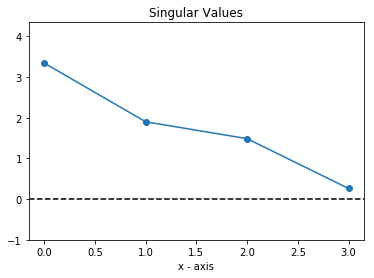

In [6]:
# plot the singular values
plt.plot(S, marker='o')
plt.xlabel('x - axis')
plt.ylim(-1 , np.max(S)+1)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Singular Values')
plt.show()

**Discussion:**
Looking at the values inside $\textbf{S}$, we notice that they are arranged in decreasing order. Moreover, we can see that all the values are significant (not null), so the rank is assumed to be $4$.

**Remark 1:**
Let $D_{max}=\max\{I,J\}$ and $D_{min}=\min\{I,J\}$, it is worth noting that Python's SVD function returns $\textbf{U}$ or $\textbf{V}$ - depending if $D_{max}=I$ or $D_{max}=J$ respectively - with dimensions $D_{max}\times D_{max}$. However, the last $(D_{max}-R)$ columns are discarded in the product $\textbf{U} \Sigma \textbf{V}^\top$ due to the sizes of the other matrices: $\textbf{S}$ is $R\times R$, and $\textbf{V}$ or $\textbf{U}$ - respectively - is $D_{min}\times R$.

**Remark 2:**
Python's SVD function returns $\textbf{V}$ that is already transposed. In the definition, $\textbf{V}$ should be transposed in order to conform to the product $\textbf{U} \Sigma \textbf{V}^\top$. In the example, the function `transpose(V)` is used conform it to the definition.

**Remark 3:**
The function returns the diagonal elements of $\textbf{S}$ as a vector instead of a matrix. Here, the function `diag(S)` is used to print $S$ as diagonal matrix.

Now, let's look at the orthogonality of the columns of $\textbf{U}$ and $\textbf{V}$:

In [7]:
# Scalar product of the columns of U and V
Scalar_Product_U = np.matmul(np.transpose(U),U)
Scalar_Product_V = np.matmul(np.transpose(V),V)

print("\nScalar Products of U =\n", Scalar_Product_U)
print("\nScalar Products of V =\n", Scalar_Product_V)


Scalar Products of U =
 [[1.000 -0.000 -0.000 0.000]
 [-0.000 1.000 0.000 -0.000]
 [-0.000 0.000 1.000 0.000]
 [0.000 -0.000 0.000 1.000]]

Scalar Products of V =
 [[1.000 -0.000 -0.000 0.000]
 [-0.000 1.000 -0.000 0.000]
 [-0.000 -0.000 1.000 -0.000]
 [0.000 0.000 -0.000 1.000]]


The two products are identity matrices, which shows that $\textbf{U}$ and $\textbf{V}$ are orthogonal matrices with normalized columns.

---

### Case of Matrix whose Columns are Linearly Dependent

Now, we build the matrix $\textbf{M}$ of dimensions $6\times 4$ such that the columns are linearly dependent on 2 vectors.

The rank of $\textbf{M}$ is expected to be $2$ in this case.

In [8]:
M = np.matrix([[-1,     7,     5,    -9],
              [ 7,     1,    15,     3],
              [ 6,     3,    15,     0],
              [ 2,    -4,     0,     6],
              [ 4,    -8,     0,    12],
              [ 4,     2,    10,     0]])

print("M =\n", M)

M =
 [[-1  7  5 -9]
 [ 7  1 15  3]
 [ 6  3 15  0]
 [ 2 -4  0  6]
 [ 4 -8  0 12]
 [ 4  2 10  0]]


Now we compute the SVD:

In [9]:
U, S, V = np.linalg.svd(M, full_matrices=False)
V = np.transpose(V)

Let's look at the factor matrices:

In [10]:
# left singular matrix
print("\nMatrix U =\n", U)

# diagonal matrix with the singular values
print("\nMatrix S =\n", np.diag(S))

# right singular matrix
print("\nMatrix V =\n", V)


Matrix U =
 [[0.209 -0.548 -0.787 0.104]
 [0.626 0.183 0.027 -0.661]
 [0.626 -0.000 0.294 0.702]
 [-0.000 0.365 -0.239 0.097]
 [-0.000 0.730 -0.478 0.195]
 [0.417 -0.000 -0.088 -0.113]]

Matrix S =
 [[26.268 0.000 0.000 0.000]
 [0.000 20.494 0.000 0.000]
 [0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000]]

Matrix V =
 [[0.365 0.267 0.476 -0.754]
 [0.183 -0.535 0.740 0.366]
 [0.913 -0.000 -0.338 0.228]
 [0.000 0.802 0.334 0.495]]


Plotting the singular values:

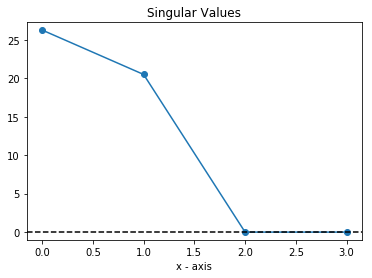

In [11]:
# plot the singular values
plt.plot(S, marker='o')
plt.xlabel('x - axis')
plt.ylim(-1 , np.max(S)+1)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Singular Values')
plt.show()

**Discussion:**

We notice that the last 2 singular values are null, which means that the rank of $\textbf{M}$ is $2$. Having a rank of $2$ means that the extra columns in $\textbf{U}$ and $\textbf{V}$ can be discarded as they have no significance in the data reconstruction, i.e. reconstructing $\textbf{M}$ using only the first two columns of $\textbf{U}$ and $\textbf{V}$.

---

### The Case of a Grayscale Image

Now, we import a $375\times 500$ grayscale image taken from the hyperspectral image of Pavia University.

Normally, images as matrices have a lot of variabilities, so the rank is relatively very high. This kind of matrix is assumed to contain some noise (not ideal), which can be smoothed by truncating the singular vectors corresponding to the smallest singular values.

After computing the SVD, we are going to truncate the least significant information, then reconstruct the image to see the changes.

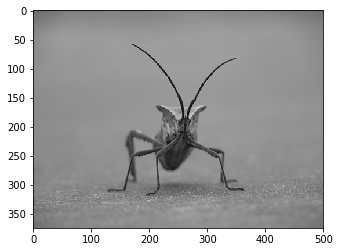

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('../data/stinkbug.png')
imgplot = plt.imshow(img)

# Grayscale
M = np.sum(img,axis=2) / 3

Compute the SVD:

In [13]:
M = np.matrix(M)

U, S, V = np.linalg.svd(M, full_matrices=False)
V = np.transpose(V)

Plot the singular values:

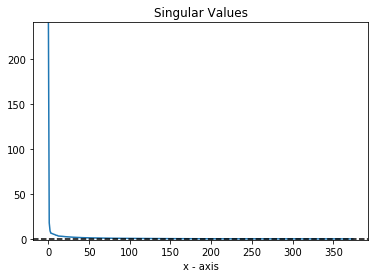

In [14]:
# plot the singular values
plt.plot(S)
plt.xlabel('x - axis')
plt.ylim(-1 , np.max(S)+1)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Singular Values')
plt.show()

Looking at the graph, we notice that among $375$ singular values, only few contribute to the most significant information.

Next, we check how much the first couple of singular values contribute to.

Here, you can tune the number of singular values and test the result, then reconstruct the image.

First, try to choose $1$ singular value and see its contribution and the reconstructed image, then do the same at least for $2, 3, 4, 5, 10, 15$, and $20$ and check the differences. Lastly, try for the full set of $375$ singular values.

1. What do you notice?
2. At which amount do you think the objects in the image can be identified (by the naked eye)?
3. How many does it require to reach 90% contribution to the data?
4. How much do you think the intrinsic rank of this image is?

Taking 100 contributes to 91.92% of the information


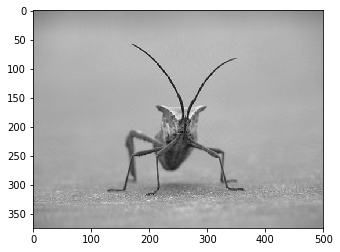

In [17]:
# Number of Singular Values
nb_singular = 100

# Contribution to the information
contribution_sum = np.sum(S[0:nb_singular]) / np.sum(S) * 100

# Print the contribution percentage
print("Taking" , nb_singular , "contributes to " + "{:.2f}".format(contribution_sum) + "% of the information")

# Reconstruct the image with the chosen number of singular values
M = U[:,0:nb_singular] * np.diag(S[0:nb_singular]) * np.transpose(V[:,0:nb_singular])
img_rec = np.array(M)
imgplot = plt.imshow(img_rec, cmap='gray')